In [365]:
import matplotlib.pyplot as plt
import numpy as np
from common_datasets.binary_classification import load_glass0
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [459]:
dataset = load_glass0()
X = dataset['data'][:, :2]
y = dataset['target']
rf = RandomForestClassifier(max_depth=5).fit(X, y)
y_pred = rf.predict_proba(X)[:, 1]
y_label = y_pred > 0.5

p = np.sum(y)
n = len(y) - np.sum(y)

p, n, len(y), len(y_pred)

(70, 144, 214, 214)

In [460]:
roc_auc_score(y, y_pred), accuracy_score(y, y_label)

(0.9826388888888888, 0.9018691588785047)

In [461]:
acc = accuracy_score(y, y_label)
sens = np.sum((y == y_label) & (y == 1)) / np.sum(y)
spec = np.sum((y == y_label) & (y == 0)) / (len(y) - np.sum(y))

In [462]:
fpr, tpr, thresholds = roc_curve(y, y_pred)

In [463]:
def max_acc_sens_spec(y_true, y_pred, p, n):
    thresholds = np.unique(y_pred)
    max_acc = 0.0
    sens = 0.0
    spec = 0.0
    for th in thresholds:
        tp = np.sum((y_true == 1) & (y_pred > th))
        tn = np.sum((y_true == 0) & (y_pred <= th))
        acc = (tp + tn) / (p + n)
        if acc > max_acc:
            max_acc = acc
            sens = tp / p
            spec = tn / n

    return max_acc, sens, spec

In [464]:
def fpr_at_sens_1(acc, p, n):
    return 1.0 - (acc * (p + n) - p) / n

In [465]:
def sens_iso_acc(acc, fpr, p, n):
    sens = fpr * n / p + acc * (p + n) / p - n / p
    n_valid = np.sum(sens <= 1.0)
    fpr = fpr[:n_valid]
    sens = sens[:n_valid]
    n_valid = np.sum(sens < 0.0)
    fpr = fpr[n_valid:]
    sens = sens[n_valid:]
    return fpr, sens

In [466]:
def extend_fpr_with_sens_1(fpr, acc, p, n):
    fpr_to_add = fpr_at_sens_1(acc, p, n)
    fpr = np.sorted(np.hstack([fpr, [fpr_to_add]]))
    return fpr

In [467]:
def roc_curve_own(y_true, y_pred, n_steps=10000):
    ths = list(reversed(np.linspace(0, 1.0, n_steps, endpoint=True)))
    tpr = []
    fpr = []
    for th in ths:
        tpr.append(np.sum((y_pred >= th) & (y_true == 1)) / np.sum(y))
        fpr.append(1.0 - np.sum((y_pred < th) & (y_true == 0)) / (len(y) - np.sum(y)))

    return np.array(fpr), np.array(tpr), np.array(ths)

In [468]:
fpr_at_sens_1(acc, p, n)

0.14583333333333337

In [469]:
len(y), len(y_pred)

(214, 214)

In [470]:
fpr, tpr, thresholds = roc_curve_own(y, y_pred)

In [471]:
acc, sens, 1.0 - spec

(0.9018691588785047, 0.7285714285714285, 0.01388888888888884)

In [483]:
acc, sens, spec = max_acc_sens_spec(y, y_pred, p, n)

In [484]:
acc, sens, spec

(0.9485981308411215, 0.9428571428571428, 0.9513888888888888)

In [485]:
auc = roc_auc_score(y, y_pred)
auc

0.9826388888888888

In [486]:
sens*spec + (1.0 - sens)*spec/2 + (1.0 - spec)*sens/2, 1.0 - (1.0 - sens)*(1.0 - spec)

(0.9471230158730158, 0.9972222222222222)

In [487]:
def fpr_max(highest_acc, p, n):
    return 1.0 - (highest_acc*(p + n) - p) / n

def auc_upper(highest_acc, p, n, fpr_max_):
    return (highest_acc * (p + n) / p - n / p) * fpr_max_ + n / p * (fpr_max_**2 / 2) + (1.0 - fpr_max_)

In [488]:
auc_upper(acc, p, n, fpr_max(acc, p, n))

0.9939980158730158

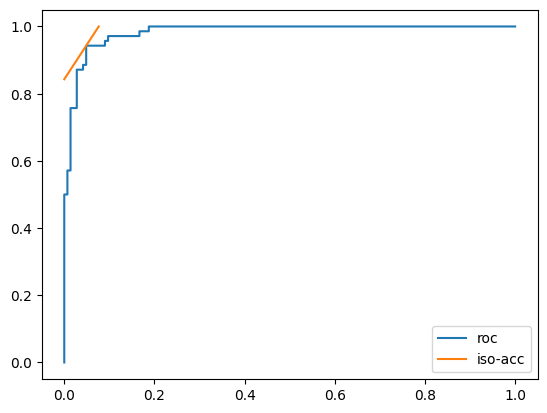

In [474]:
plt.plot(fpr, tpr, label='roc')
plt.plot(*sens_iso_acc(acc, fpr, np.sum(y), len(y) - np.sum(y)), label='iso-acc')
plt.legend()

In [ ]:
thresholds

array([1.00000000e+00, 9.99899990e-01, 9.99799980e-01, ...,
       2.00020002e-04, 1.00010001e-04, 0.00000000e+00])

In [ ]:
fpr, tpr, thresholds

(array([0., 0., 0., ..., 1., 1., 1.]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.00000000e+00, 9.99899990e-01, 9.99799980e-01, ...,
        2.00020002e-04, 1.00010001e-04, 0.00000000e+00]))

In [ ]:
th = 0.08341382
np.sum((y_pred > th) & (y == 1)) / np.sum(y), 1.0 - np.sum((y_pred <= th) & (y == 0)) / (len(y) - np.sum(y)), np.sum(y), len(y - np.sum(y))

(1.0, 0.5138888888888888, 70, 214)

In [ ]:
auc = 0.5

while auc < 0.8:
    y_test = np.random.randint(0, 2, 30)
    y_pred = np.random.random_sample(30)

    auc = roc_auc_score(y_test, y_pred)

In [ ]:
auc

0.8803827751196172

In [ ]:
highest_acc = 0.0

for threshold in np.linspace(0.0, 1.0, 1000):
    p = np.sum(y_test == 1)
    n = len(y_test) - p
    tp = np.sum((y_pred >= threshold) & (y_test == 1))
    tn = np.sum((y_pred < threshold) & (y_test == 0))

    tmp_acc = (tp + tn)/(p + n)
    if tmp_acc > highest_acc:
        highest_acc = tmp_acc

highest_acc

0.8666666666666667

In [ ]:
p = np.sum(y_test == 1)
n = len(y_test) - p
tp = np.sum((y_pred >= 0.5) & (y_test == 1))
tn = np.sum((y_pred < 0.5) & (y_test == 0))

p, tp, n, tn

(19, 12, 11, 10)

In [ ]:
def fpr_max(highest_acc, p, n):
    return 1.0 - (highest_acc*(p + n) - p) / n

def auc_upper(highest_acc, p, n, fpr_max_):
    return (highest_acc * (p + n) / p - n / p) * fpr_max_ + n / p * (fpr_max_**2 / 2) + (1.0 - fpr_max_)

In [ ]:
def auc_upper(highest_acc, p, n, fpr_max_):
    return (highest_acc * (p + n) / p - n / p) * fpr_max_ + n / p * (fpr_max_**2 / 2) + (1.0 - fpr_max_)

In [ ]:
fpr_max(highest_acc, p, n)**2

0.1322314049586777

In [ ]:
auc_upper(highest_acc, p, n, fpr_max_=fpr_max(highest_acc, p, n))

0.9617224880382775

In [ ]:
highest_acc * (p + n) / p - (n/(2*p))

1.0789473684210527

In [ ]:
def se(acc, fpr, p, n):
    return (acc*(p + n) - (n*(1 - fpr)))/p

In [ ]:
se(highest_acc, fpr_max(highest_acc, p, n), p, n)

1.0

In [ ]:
ls = np.linspace(0.0, 1.0, 1000)
ls = ls[ls <= fpr_max(highest_acc, p, n)]
np.sum(se(highest_acc, ls, p, n) * 1e-3), fpr_max(highest_acc, p, n)

(0.3256554449186028, 0.36363636363636365)

In [ ]:
auc_upper(highest_acc, p, n, fpr_max(highest_acc, p, n))

0.9617224880382775

In [ ]:
se(highest_acc, 0, n, p)

0.6363636363636364

In [ ]:
se_tmp = se(highest_acc, 0.2, n, p)

In [ ]:
(se_tmp*p + n*(1 - 0.2)) / (p + n)

0.9151515151515152

In [ ]:
sens = tp/p
spec = tn/n
sens, spec

(0.631578947368421, 0.9090909090909091)

In [ ]:
auc_lower = sens*spec
auc_upper = 1.0 - (1.0 + sens*spec - sens - spec)

In [ ]:
auc_lower, auc_upper

(0.5741626794258373, 0.9665071770334929)

In [ ]:
mask0 = y_test == 0
mask1 = ~mask0

In [ ]:
(np.sum(y_test == 0) * np.sum(y_test == 1))

209

In [ ]:
y_pred_0 = y_pred[mask0]
y_pred_1 = y_pred[mask1]

y_pred_0 = np.sort(y_pred_0)
y_pred_1 = np.sort(y_pred_1)

In [ ]:
np.sum(y_pred[mask0] < y_pred[mask1, None]) / (np.sum(y_test == 0) * np.sum(y_test == 1))

0.8803827751196173

In [ ]:
np.sum(y_pred_0 < y_pred_1[:, None]) / (y_pred_0.shape[0] * y_pred_1.shape[0])

0.8803827751196173

In [ ]:
y_pred_0, y_pred_1

(array([0.01720317, 0.06098437, 0.07209726, 0.12980208, 0.15641371,
        0.15762085, 0.17631225, 0.17701718, 0.2458146 , 0.36437823,
        0.6504164 ]),
 array([0.02986345, 0.18431868, 0.23788079, 0.25830379, 0.2911928 ,
        0.41398315, 0.46443193, 0.56501104, 0.59611109, 0.64554938,
        0.66294018, 0.70232579, 0.71284228, 0.72562443, 0.88810102,
        0.93009119, 0.95184502, 0.98370992, 0.99015865]))

In [ ]:
y_pred_0 < y_pred_1[:, None]

array([[ True, False, False, False, False, False, False, False, False,
        False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False],
       [ True,  True,  True,  True,  True,  True,  True,  Tr